## Loading Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Data Preprocessing + Cleaning

In [33]:
df=pd.read_csv('data.csv',encoding='latin-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [35]:
df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
df['age']=df['age'].round(0)
df['age']=df['age'].astype('int32')
df['age'].head(10)

0    42
1    41
2    43
3    58
4    57
5    57
6    47
7    50
8    47
9    43
Name: age, dtype: int32

In [38]:
df['annual Salary']=df['annual Salary'].round(2)
df['annual Salary'].head()

0    62812.09
1    66646.89
2    53798.55
3    79370.04
4    59729.15
Name: annual Salary, dtype: float64

In [39]:
df['credit card debt']=df['credit card debt'].round(2)
df['credit card debt'].head()

0    11609.38
1     9572.96
2    11160.36
3    14426.16
4     5358.71
Name: credit card debt, dtype: float64

In [40]:
df['net worth']=df['net worth'].round(2)
df['net worth'].head()

0    238961.25
1    530973.91
2    638467.18
3    548599.05
4    560304.07
Name: net worth, dtype: float64

## Data Visualization

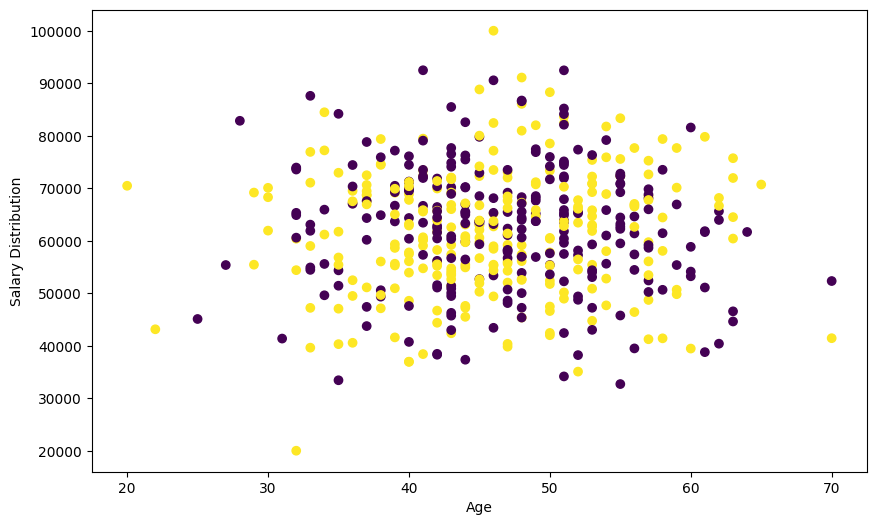

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(data=df,x='age',y='annual Salary',c='gender')
plt.xlabel('Age')
plt.ylabel('Salary Distribution')
plt.show()

In [45]:
df.corr()

C:\Users\karee\AppData\Local\Temp\ipykernel_4632\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.066488,-0.036499,0.024193,-0.008395,-0.066408
age,-0.066488,1.000000,0.000361,0.031748,0.021794,0.633273
annual Salary,-0.036499,0.000361,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.031748,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.021794,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.633273,0.617862,0.028882,0.488580,1.000000


## Applying ANN Model

In [46]:
df.drop(columns=['customer name',	'customer e-mail'	,'country'],inplace=True)
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,42,62812.09,11609.38,238961.25,35321.45877
1,0,41,66646.89,9572.96,530973.91,45115.52566
2,1,43,53798.55,11160.36,638467.18,42925.70921
3,1,58,79370.04,14426.16,548599.05,67422.36313
4,1,57,59729.15,5358.71,560304.07,55915.46248


In [47]:
X = df.drop('car purchase amount',axis=1)
y = df['car purchase amount']

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
SS=StandardScaler()
X_train=SS.fit_transform(X_train)
SS

StandardScaler()

In [59]:
X_test=SS.fit_transform(X_test)

In [72]:
model = Sequential([
    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['mse'])


In [74]:
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2)

Epoch 1/300
10/10 [==============================] - 0s 13ms/step - loss: 581.4077 - mse: 1089447.6250 - val_loss: 677.3827 - val_mse: 952260.0000
Epoch 2/300
10/10 [==============================] - 0s 7ms/step - loss: 566.8873 - mse: 1095262.5000 - val_loss: 637.9126 - val_mse: 854625.1250
Epoch 3/300
10/10 [==============================] - 0s 6ms/step - loss: 554.3127 - mse: 1029231.0000 - val_loss: 635.2238 - val_mse: 825352.0000
Epoch 4/300
10/10 [==============================] - 0s 7ms/step - loss: 553.8942 - mse: 997169.6875 - val_loss: 619.1818 - val_mse: 845541.8750
Epoch 5/300
10/10 [==============================] - 0s 6ms/step - loss: 534.2865 - mse: 961415.6875 - val_loss: 611.0226 - val_mse: 803232.1875
Epoch 6/300
10/10 [==============================] - 0s 7ms/step - loss: 529.7845 - mse: 963602.3125 - val_loss: 607.2304 - val_mse: 807760.1250
Epoch 7/300
10/10 [==============================] - 0s 6ms/step - loss: 516.6581 - mse: 938201.0000 - val_loss: 601.2294 - va

## Evaluation

Text(0, 0.5, 'Loss')

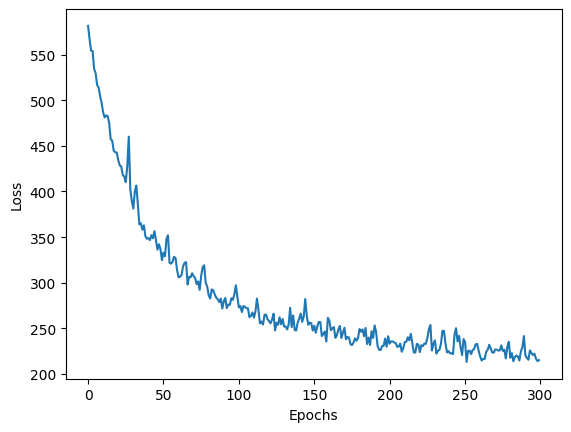

In [75]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [77]:
model.save('model.h5')

E:\Anaconda_app\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
